In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

AdaBoost(Booting)

In [6]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_scaled, y_train)
ada_pred = ada.predict(X_test_scaled)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier

In [7]:
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
dt_clf = DecisionTreeClassifier()

In [8]:
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svc', svc_clf),
    ('dt', dt_clf)
], voting='soft')

In [9]:
voting_clf.fit(X_train_scaled, y_train)
voting_pred = voting_clf.predict(X_test_scaled)

In [10]:
def evaluate_model(name, y_true, y_pred):
    print(f"------ {name} ------")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [11]:
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("AdaBoost", y_test, ada_pred)
evaluate_model("Voting Classifier", y_test, voting_pred)

------ Random Forest ------
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


------ AdaBoost ------
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


------ Voting Classifier ------
Accuracy: 0.9649122807017544
Classification Report:
               precision 

<Figure size 800x600 with 0 Axes>

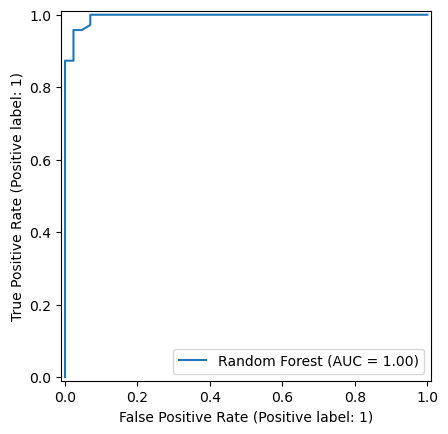

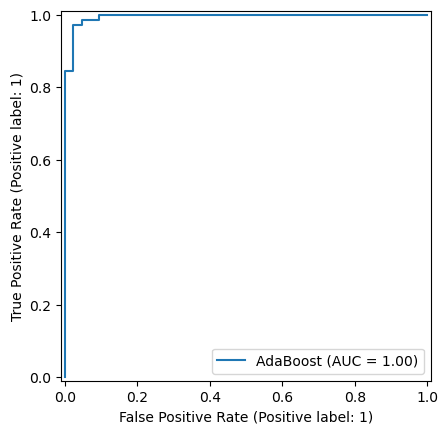

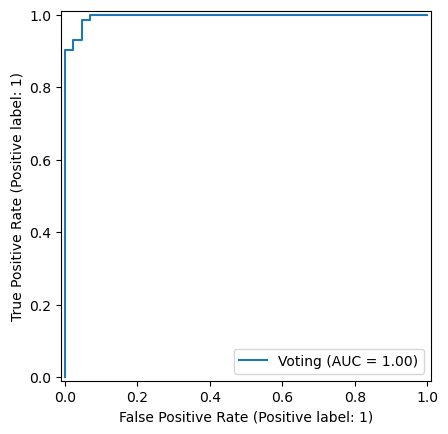

In [12]:
plt.figure(figsize=(8, 6))
for clf, name in zip([rf, ada, voting_clf], ["Random Forest", "AdaBoost", "Voting"]):
    RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test, name=name)